# Cassava Disease Detection with CropNet

In [1]:
# install
!pip install tensorflow tensorflow_hub tensorflow_datasets

In [2]:
# import
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the cassava dataset from TF Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'cassava',
    split=['train[:10%]', 'train[10%:12%]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/incomplete.F35P2B_0.1.0/cassava-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/incomplete.F35P2B_0.1.0/cassava-test.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/incomplete.F35P2B_0.1.0/cassava-validation.tfrecord*...:   0%|    …

Dataset cassava downloaded and prepared to /root/tensorflow_datasets/cassava/0.1.0. Subsequent calls will reuse this data.


In [4]:
class_names = ds_info.features['label'].names
print("class names:", class_names)

class names: ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [5]:
# preprocessing function
def preprocess_image(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.cast(img, tf.float32) / 255.0
    return tf.expand_dims(img, 0)

# Load the Pre-trained CropNet Model

In [6]:
# load pre-trained CropNet cassava disease classifier
model = hub.load("https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2")

# Predict Function

In [7]:
def predict(img):
    img_input = preprocess_image(img)
    output = model(img_input, training=False)
    probs = output[0].numpy()
    pred_idx = np.argmax(probs)
    confidence = probs[pred_idx]

    return pred_idx, confidence, probs

In [8]:
ds_test_list = [next(iter(ds_test.skip(i).take(1))) for i in range(6)]

# Visualize Predictions

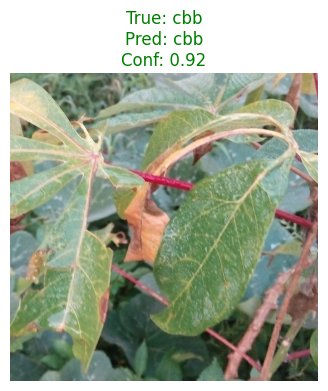

In [9]:
image, label = ds_test_list[0]
pred_class, conf, _ = predict(image)
true_class = int(label)
color = 'green' if pred_class == true_class else 'red'

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}\nConf: {conf:.2f}", color=color)
plt.axis('off')
plt.show()

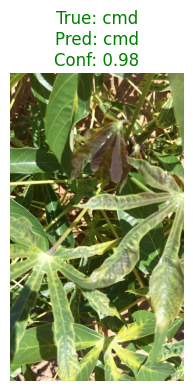

In [10]:
image, label = ds_test_list[1]
pred_class, conf, _ = predict(image)
true_class = int(label)
color = 'green' if pred_class == true_class else 'red'

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}\nConf: {conf:.2f}", color=color)
plt.axis('off')
plt.show()

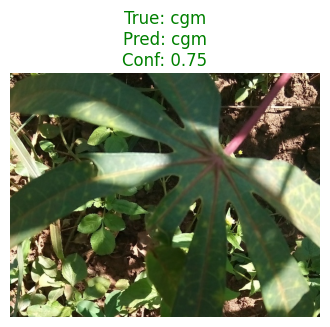

In [11]:
image, label = ds_test_list[2]
pred_class, conf, _ = predict(image)
true_class = int(label)
color = 'green' if pred_class == true_class else 'red'

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}\nConf: {conf:.2f}", color=color)
plt.axis('off')
plt.show()

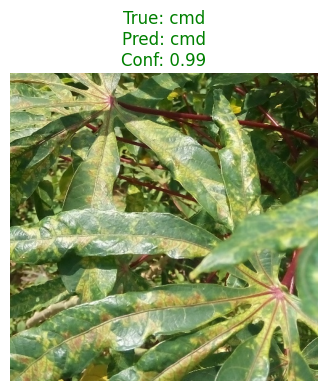

In [12]:
image, label = ds_test_list[3]
pred_class, conf, _ = predict(image)
true_class = int(label)
color = 'green' if pred_class == true_class else 'red'

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}\nConf: {conf:.2f}", color=color)
plt.axis('off')
plt.show()

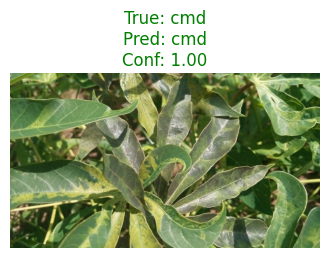

In [13]:
image, label = ds_test_list[4]
pred_class, conf, _ = predict(image)
true_class = int(label)
color = 'green' if pred_class == true_class else 'red'

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}\nConf: {conf:.2f}", color=color)
plt.axis('off')
plt.show()

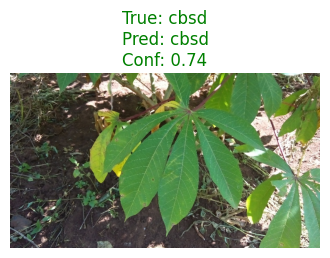

In [14]:
image, label = ds_test_list[5]
pred_class, conf, _ = predict(image)
true_class = int(label)
color = 'green' if pred_class == true_class else 'red'

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}\nConf: {conf:.2f}", color=color)
plt.axis('off')
plt.show()